In [1]:
# import libraries
from sklearn.decomposition import PCA
import openai
from dotenv import load_dotenv
import numpy as np
import os


# set sklearn seed
np.random.seed(42)

load_dotenv()

colors_representations = [
    "I'm the color of the sky",
    "I'm the color of the grass",
    "I'm the color of the ocean",
    "I'm the color of the trees",
    "I'm the color of the sun",
    "I'm the color of the moon",
    "I'm the color of the sand",
]



In [2]:

openai.api_type = "azure"
openai.api_key = os.environ.get("AZURE_OPENAI_API_KEY")
openai.api_base = os.environ.get("AZURE_OPENAI_ENDPOINT")
openai.api_version = "2023-05-15"

embeddings = []
for colors_representation in colors_representations:
    response = openai.Embedding.create(
        input=colors_representation,
        engine=os.environ.get("AZURE_OPENAI_EMBEDDING_NAME"),
    )
    embedding = response['data'][0]['embedding']
    print(f"Embedding for:\n'{colors_representation}'\nembedding vector:\n{embedding}\n")
    embeddings.append(embedding)

Embedding for:
'I'm the color of the sky'
embedding vector:
[-0.00666575413197279, -0.008186757564544678, -0.004060050006955862, -0.01760970987379551, -0.040164198726415634, 0.012858845293521881, -0.02042144536972046, -0.022772639989852905, 0.0036873738281428814, -0.019779110327363014, -0.023402856662869453, -0.0036116265691816807, 0.0003562012279871851, -0.013052757829427719, -0.009786538779735565, -0.015719059854745865, 0.029523229226469994, -0.02123345620930195, -0.008144339546561241, 0.009265397675335407, -0.01447074580937624, 0.0187368281185627, 0.005314423702657223, 0.004153976682573557, -0.00666575413197279, 0.007429285906255245, 0.020930467173457146, -0.03231072798371315, 0.029765620827674866, -0.01729460060596466, 0.006841487251222134, 0.0007847410161048174, 0.005699219647794962, -0.008944230154156685, -0.01545242965221405, -0.02525714784860611, 0.005138690117746592, -0.011998357251286507, -0.01041069533675909, -0.02819008007645607, -0.0006499110022559762, 0.003875226946547627

In [3]:
# perform PCA on the embeddings
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [4]:
colors_representations_reduced_dimensionality = pca.transform(embeddings)

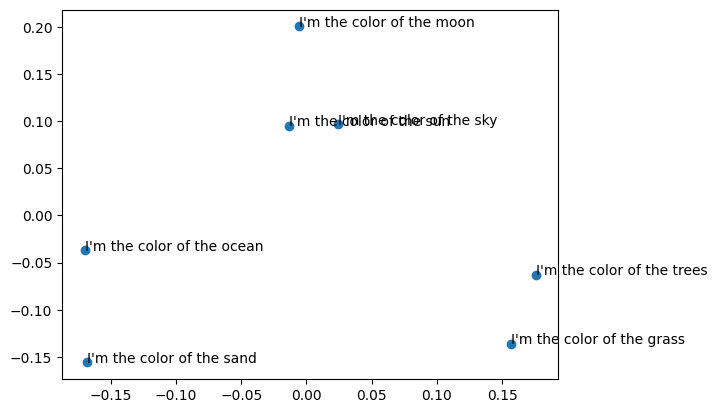

Number of rows and columns in the reduced dimensionality embeddings: (7, 2)
[[ 0.02455126  0.09672864]
 [ 0.1568159  -0.13617956]
 [-0.17005308 -0.03706143]
 [ 0.17565879 -0.06325881]
 [-0.01300311  0.09527243]
 [-0.00583644  0.20031451]
 [-0.16813332 -0.15581579]]


In [5]:
# plot the reduced dimensionality embeddings, make the graph visually appealing and interactive. Make sure you use industry best practices. Make sure it is clear what the graph is showing.
import matplotlib.pyplot as plt
import numpy as np

x = colors_representations_reduced_dimensionality[:, 0]
y = colors_representations_reduced_dimensionality[:, 1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(colors_representations):
    ax.annotate(txt, (x[i], y[i]))
# print(colors_representations_reduced_dimensionality)
plt.show()



# print number of rows and columns in the reduced dimensionality embeddings
print(f"Number of rows and columns in the reduced dimensionality embeddings: {colors_representations_reduced_dimensionality.shape}")
print(colors_representations_reduced_dimensionality)

In [6]:
vehicle_representations = [
    "I'm an object that can fly",
    "I'm an object that can swim",
    "I'm an object that can drive",
]

In [7]:
combined_representations = colors_representations + vehicle_representations

In [8]:
embeddings = []
for combined_representation in combined_representations:
    response = openai.Embedding.create(
        input=combined_representation,
        engine=os.environ.get("AZURE_OPENAI_EMBEDDING_NAME"),
    )
    embedding = response['data'][0]['embedding']
    print(f"Embedding for:\n'{colors_representation}'\nembedding vector:\n{embedding}\n")
    embeddings.append(embedding)


Embedding for:
'I'm the color of the sand'
embedding vector:
[-0.00666575413197279, -0.008186757564544678, -0.004060050006955862, -0.01760970987379551, -0.040164198726415634, 0.012858845293521881, -0.02042144536972046, -0.022772639989852905, 0.0036873738281428814, -0.019779110327363014, -0.023402856662869453, -0.0036116265691816807, 0.0003562012279871851, -0.013052757829427719, -0.009786538779735565, -0.015719059854745865, 0.029523229226469994, -0.02123345620930195, -0.008144339546561241, 0.009265397675335407, -0.01447074580937624, 0.0187368281185627, 0.005314423702657223, 0.004153976682573557, -0.00666575413197279, 0.007429285906255245, 0.020930467173457146, -0.03231072798371315, 0.029765620827674866, -0.01729460060596466, 0.006841487251222134, 0.0007847410161048174, 0.005699219647794962, -0.008944230154156685, -0.01545242965221405, -0.02525714784860611, 0.005138690117746592, -0.011998357251286507, -0.01041069533675909, -0.02819008007645607, -0.0006499110022559762, 0.00387522694654762

In [9]:
# fit PCA on the embeddings
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

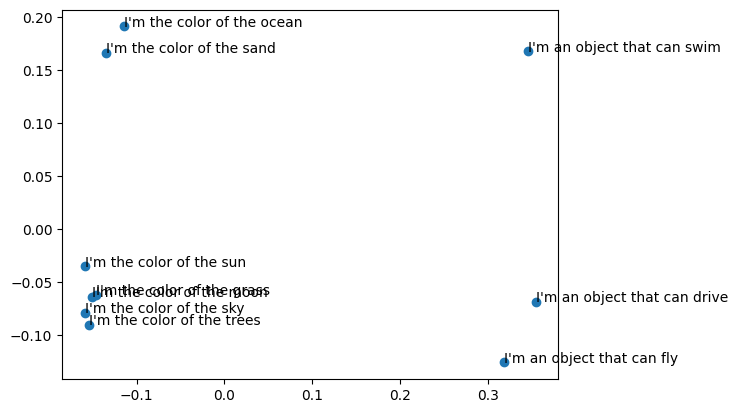

In [10]:
# transform the embeddings
combined_representations_reduced_dimensionality = pca.transform(embeddings)

# plot the reduced dimensionality embeddings, make the graph visually appealing and interactive. Make sure you use industry best practices. Make sure it is clear what the graph is showing.

x = combined_representations_reduced_dimensionality[:, 0]
y = combined_representations_reduced_dimensionality[:, 1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(combined_representations):
    ax.annotate(txt, (x[i], y[i]))

plt.show()


In [11]:
BASE_PROMPT = """
You are given a question and the closest representation to that question.
Create a small poem that answers the question and uses the representation.
The information you can use is provided in the section called [QUESTION] and [INFORMATION].

[QUESTION]:
<question>

[INFORMATION]
<information>
[END INFORMATION]

Write the poem here about the question and representation:
"""


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
# embed the question and find the most similar representation based on cosine similarity
def get_most_similar_representation(question, embeddings, representations):
    # embed the question
    response = openai.Embedding.create(
        input=question,
        engine=os.environ.get("AZURE_OPENAI_EMBEDDING_NAME"),
    )
    question_embedding = response['data'][0]['embedding']
    
    # calculate the cosine similarity between the question embedding and the representations embeddings
    similarities = cosine_similarity(
        np.array(question_embedding).reshape(1, -1),
        np.array(embeddings)
    )

    # get the index of the most similar representation
    most_similar_representation_index = np.argmax(similarities)

    # return the most similar representation
    return representations[most_similar_representation_index], question_embedding, similarities,most_similar_representation_index


In [13]:
question = "How would you represent a driveable car?"
most_similar_representation, question_embedding, similarities, most_similar_representation_index = get_most_similar_representation(
    question=question,
    embeddings=embeddings,
    representations=combined_representations
)


In [14]:
print("Question:\n", question)
print("Question embedding:\n", question_embedding)

print("Document embeddings:")
print(*embeddings, sep='\n')

print("Similarities (higher is better):")
print(*similarities, sep='\n')

print("Most similar representation index:\n", most_similar_representation_index)

print("Most similar representation:\n", most_similar_representation)

Question:
 How would you represent a driveable car?
Question embedding:
 [-0.011322151869535446, 0.009532326832413673, 0.003968451172113419, -0.002828862052410841, -0.00899604894220829, 0.0018702666275203228, -0.013929799199104309, 0.003509263740852475, -0.012984611093997955, -0.026223953813314438, -0.0038310298696160316, 0.039040978997945786, 0.004715887364000082, 0.006844237446784973, -0.003941636998206377, 0.008768131956458092, 0.014881690964102745, -0.005909103900194168, 0.018206609413027763, -0.01016245223581791, -0.005356068257242441, -0.017040206119418144, -0.0007905898382887244, -0.027041776105761528, -0.014787842519581318, 0.014452669769525528, 0.01962774433195591, -0.007186113856732845, 0.009927830658853054, -0.015337526798248291, 0.04574444144964218, -0.00823855772614479, -0.010551253333687782, -0.0191585011780262, -0.0018317216308787465, -0.0011798097984865308, 0.012944390065968037, 5.106154731038259e-06, 0.02336827665567398, 0.014171123504638672, 0.0023646471090614796, 0.0

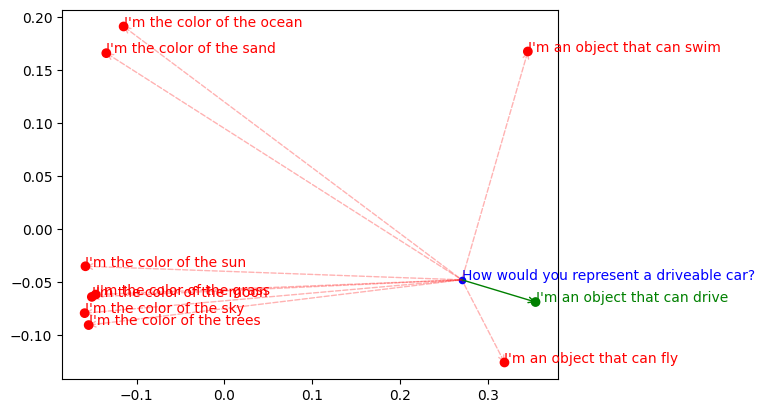

In [15]:
# transform using pca and plot
question_embedding_reduced_dimensionality = pca.transform([question_embedding])

x = combined_representations_reduced_dimensionality[:, 0]
y = combined_representations_reduced_dimensionality[:, 1]

fig, ax = plt.subplots()

colors = ["green" if i == most_similar_representation_index else "red" for i in range(len(combined_representations))]

ax.scatter(x, y, color=colors)

for i, txt in enumerate(combined_representations):

    color = "green" if i == most_similar_representation_index else "red"
    ax.annotate(txt, (x[i], y[i]),
                color=color
                )

ax.scatter(
    question_embedding_reduced_dimensionality[:, 0],
    question_embedding_reduced_dimensionality[:, 1],
    color="blue",
    s=20
)
ax.annotate(question, (question_embedding_reduced_dimensionality[:, 0], question_embedding_reduced_dimensionality[:, 1]), color="blue")

# create pointing arrows from the question to all representations
for i, txt in enumerate(combined_representations):

    color = "green" if i == most_similar_representation_index else "red"
    linestyle = "solid" if i == most_similar_representation_index else "dashed"
    alpha = 1 if i == most_similar_representation_index else 0.3
    ax.annotate(
        "",
        xy=(question_embedding_reduced_dimensionality[:, 0], question_embedding_reduced_dimensionality[:, 1]),
        xytext=(x[i], y[i]),
        arrowprops=dict(arrowstyle="<-", color=color, shrinkA=0, shrinkB=0, linestyle=linestyle, alpha=alpha)
    )

plt.show()


In [16]:
prompt_to_complete = BASE_PROMPT.replace("<question>", question).replace("<information>", most_similar_representation)
# complete the prompt
chat_completion = openai.ChatCompletion.create(deployment_id=os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"),  messages=[{"role": "user", "content": prompt_to_complete}],
                                               temperature=0.0,
                                               top_p=1.0,
                                               )
print("=========== BASE PROMPT =================")
print(BASE_PROMPT)
print("=========== PROMPT =================")
print(prompt_to_complete)
print("=========== RESPONSE =================")
print(chat_completion['choices'][0]['message']["content"])


=========== BASE PROMPT =================

You are given a question and the closest representation to that question.
Create a small poem that answers the question and uses the representation.
The information you can use is provided in the section called [QUESTION] and [INFORMATION].

[QUESTION]:
<question>

[INFORMATION]
<information>
[END INFORMATION]

Write the poem here about the question and representation:

=========== PROMPT =================

You are given a question and the closest representation to that question.
Create a small poem that answers the question and uses the representation.
The information you can use is provided in the section called [QUESTION] and [INFORMATION].

[QUESTION]:
How would you represent a driveable car?

[INFORMATION]
I'm an object that can drive
[END INFORMATION]

Write the poem here about the question and representation:

=========== RESPONSE =================
I am a machine with wheels
A metal beast that roars and squeals
I am an object that can d